In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import keras
from sklearn.utils import shuffle
from PIL import Image

In [4]:
from glob import glob
import cv2
from PIL import Image, ImageStat
import math
trn1='D:/invasive-aquatic-species-data/invasive/*/'
trn2='D:/invasive-aquatic-species-data/noninvasive/*/'
tr1= glob(trn1)
tr2= glob(trn2)

In [3]:
tr1= shuffle(tr1)
tr2= shuffle(tr2)

In [5]:
tran_index_inv = np.round( len(tr1)* .8  )
tran_index_noninv = np.round( len(tr2)* .8  )
tran_index_noninv

2337.0

In [8]:
data = []
label = []
for i in tr1[:(int) (tran_index_inv)]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(1)


for i in tr2[:(int)(tran_index_noninv)]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(0)

imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = a.resize((40, 40))
    c = np.array(b)
    imgdata.append(c.reshape(40,40,3))
    

In [9]:
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_train = idata
X_train = X_train.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train),40,40,3))
# One hot vector representation of labels
Y_train = to_categorical(label)

X_train,Y_train = shuffle(X_train,Y_train)

In [10]:
data = []
label = []
for i in tr1[(int) (tran_index_inv) + 1 :]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(1)


for i in tr2[ (int)(tran_index_noninv) + 1:]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(0)

imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = a.resize((40, 40))
    c = np.array(b)
    imgdata.append(c.reshape(40,40,3))
    

In [11]:
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_test = idata
X_test = X_test.astype('float32') / 255.
X_test = np.reshape(X_test, (len(X_test),40,40,3))
# One hot vector representation of labels
Y_test = to_categorical(label)

X_test,Y_test = shuffle(X_test , Y_test)

In [12]:
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [10]:

def tep1(x):
    
    a= tf.multiply(x,-15.00)   
    ex=tf.exp(a)
    b=tf.add(ex,1.00)
    m=tf.truediv(1.00,b)
    
    return m;

def tep2(x):       #   1 / (1 + exp(-10x))  
    
    a= tf.multiply(x,-10.00)
    ex=tf.exp(a)
    b=tf.add(ex,1.00)
    m=tf.truediv(1.00,b)
    
    return m;

def tep3(x):     #   1 / (1 + exp(-2x))  
    
    a= tf.multiply(x,-2.00)
    ex=tf.exp(a)
    b=tf.add(ex,1.00)
    m=tf.truediv(1.00,b)
    return m;



In [13]:

model = models.Sequential()
model.add(layers.Conv2D(16,   (3, 3), input_shape=(40,40,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8,   (3, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(4,   (3, 3),))
model.add(layers.Flatten()) 
model.add(layers.Dense(125,activation="tanh"))
model.add(layers.Dense(48,  name='encoder' ))
model.add(layers.Dense(125 ,  activation="tanh"))
model.add(Reshape((  5,5,5)))
model.add(layers.Conv2D(4,    (3, 3),  padding='same'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D( 8,   (3, 3),  padding='same'))
model.add(layers.UpSampling2D((2, 2))) 
model.add(layers.Conv2D( 16, (3, 3), padding='same'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(3,   (3, 3),  padding='same'))
#model.summary()

In [14]:
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=('accuracy'))

model.fit(X_train, X_train, epochs=10, batch_size=32, validation_split = .2, verbose = 1)

Epoch 1/10
1775/1775 [==============================] - 101s 56ms/step - loss: 0.0024 - accuracy: 0.7357 - val_loss: 0.0013 - val_accuracy: 0.8115
Epoch 2/10
1775/1775 [==============================] - 126s 71ms/step - loss: 0.0012 - accuracy: 0.8158 - val_loss: 0.0011 - val_accuracy: 0.8231
Epoch 3/10
1775/1775 [==============================] - 141s 79ms/step - loss: 9.9170e-04 - accuracy: 0.8263 - val_loss: 9.3466e-04 - val_accuracy: 0.8291
Epoch 4/10
1775/1775 [==============================] - 122s 69ms/step - loss: 9.1876e-04 - accuracy: 0.8303 - val_loss: 8.7823e-04 - val_accuracy: 0.8349
Epoch 5/10
1775/1775 [==============================] - 124s 70ms/step - loss: 8.7218e-04 - accuracy: 0.8328 - val_loss: 8.6288e-04 - val_accuracy: 0.8334
Epoch 6/10
1775/1775 [==============================] - 112s 63ms/step - loss: 8.5340e-04 - accuracy: 0.8340 - val_loss: 8.9882e-04 - val_accuracy: 0.8401
Epoch 7/10
1775/1775 [==============================] - 116s 66ms/step - loss: 8.4325e

In [ ]:
model.fit(X_train, X_train, epochs=4, batch_size=32, validation_split = .3, verbose = 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


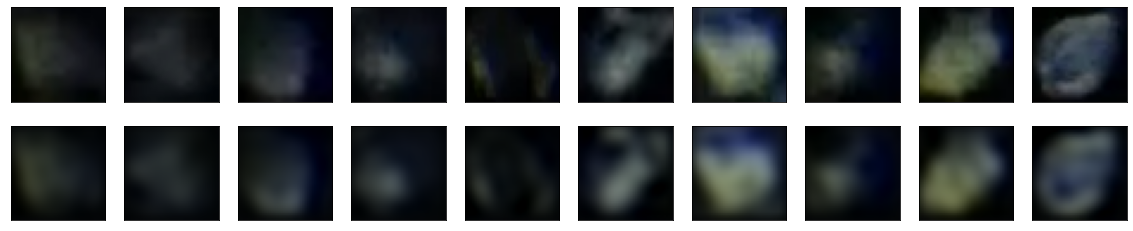

In [13]:

decoded_imgs = model.predict(X_test)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(40, 40,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(40, 40,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
encoder = Model(inputs=model.input, outputs=model.get_layer('encoder').output)
encoded = encoder.predict(X_test)

encoded[5]

array([ 0.09042332, -0.14832634,  0.12179728,  0.02646714,  0.00520777,
        0.13482165,  0.03922839, -0.03109347, -0.04917123, -0.18296838,
       -0.01516323,  0.02028981,  0.04097608, -0.04301634,  0.03081672,
       -0.05900868,  0.16479075,  0.00353917, -0.09899399, -0.02473109,
        0.00590737,  0.16798092, -0.15905593,  0.02880361,  0.05131235,
       -0.03247732, -0.01066871,  0.09863549, -0.0119349 ,  0.01601046,
       -0.06994224, -0.07902218,  0.08374712,  0.02859613, -0.00218046,
       -0.03807939,  0.0815795 ,  0.0982972 , -0.12480534,  0.05906802,
       -0.22868761, -0.05058189,  0.00888338, -0.05482937,  0.1286051 ,
       -0.11771748,  0.04179313,  0.14585137], dtype=float32)

In [15]:
from keras.models import load_model

model.save('encoder80.h5') 